Epoch: 100; Error: 0.2108123564390502;
Epoch: 200; Error: 0.01055657900503282;
The goal of learning is reached


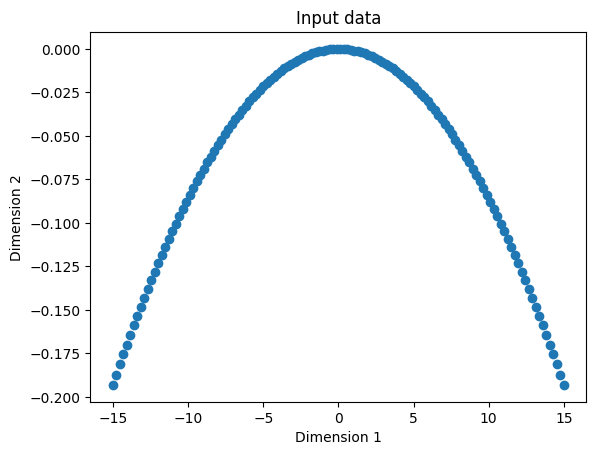

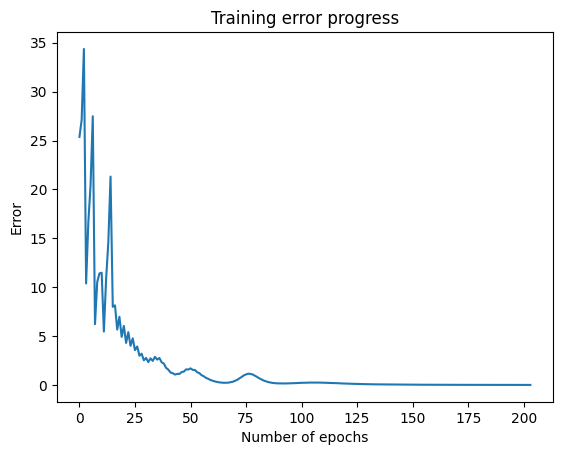

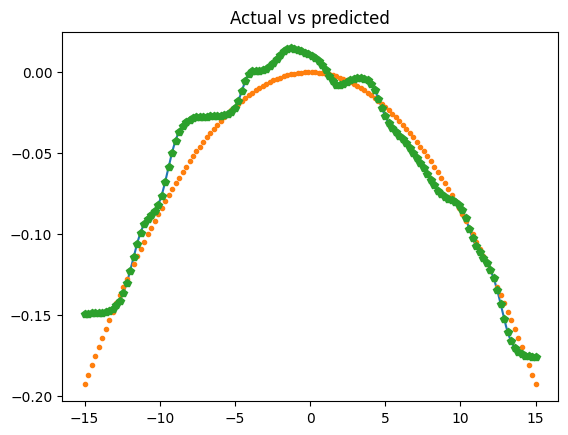

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = -1* np.square(x)
y /= np.linalg.norm(y)

# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

# Train the neural network
error_progress = nn.train(data, labels, epochs=3000, show=100, goal=0.01)

# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

# Plot the output 
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

plt.show()
